# drug-gym demo

Imports

In [1]:
%reload_ext autoreload
%autoreload 2

import rdkit
rdkit.Chem.Draw.IPythonConsole.ipython_maxProperties = -1

import dgym as dg

# load all data
path = '../../dgym-data'

deck = dg.MoleculeCollection.load(
    f'{path}/DSi-Poised_Library_annotated.sdf',
    reactant_names=['reagsmi1', 'reagsmi2', 'reagsmi3']
)

reactions = dg.ReactionCollection.from_json(
    path = f'{path}/All_Rxns_rxn_library.json',
    smarts_col = 'reaction_string',
    classes_col = 'functional_groups'
)

building_blocks = dg.datasets.disk_loader(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630.sdf')
fingerprints = dg.datasets.fingerprints(f'{path}/Enamine_Building_Blocks_Stock_262336cmpd_20230630_atoms.fpb')

import torch
import pyarrow.parquet as pq
table = pq.read_table('../../dgym-data/sizes.parquet')[0]
sizes = torch.tensor(table.to_numpy())

In [36]:
import json

reaction_dict = json.load(open(f'{path}/All_Rxns_rxn_library.json', 'r'))

In [2]:
from dgym.molecule import Molecule
from dgym.envs.designer import Designer, Generator
from dgym.envs.drug_env import DrugEnv
from dgym.agents import SequentialDrugAgent
from dgym.agents.exploration import EpsilonGreedy
from dgym.experiment import Experiment

designer = Designer(
    Generator(building_blocks, fingerprints, sizes),
    reactions,
    cache = True
)

In [3]:
from rdkit.Chem.Draw import MolsToGridImage

designer.reset_cache()
analogs = designer.design(deck[20], size=10, mode='grow')
new_analogs = designer.design(analogs[0], size=5, replace=1, mode='replace')
# new_analogs = designer.design(new_analogs[0], size=5, mode='grow')
# MolsToGridImage([m.mol for m in new_analogs], molsPerRow=5)

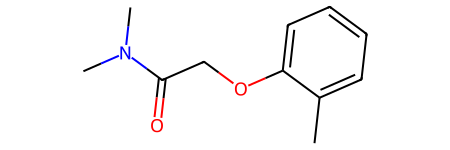

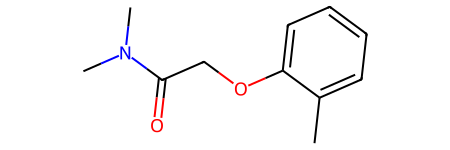

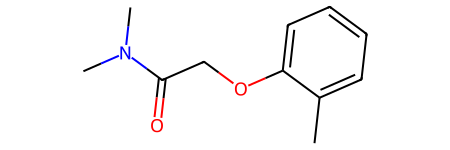

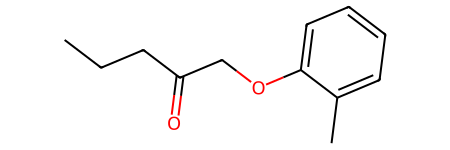

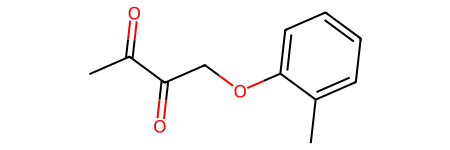

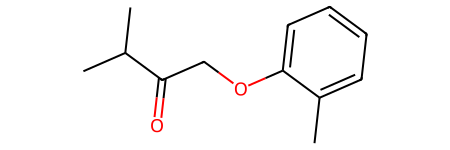

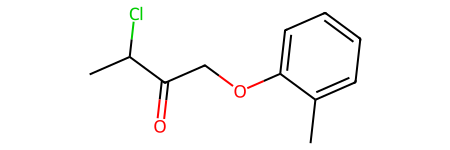

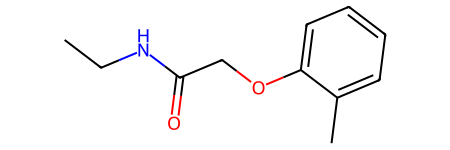

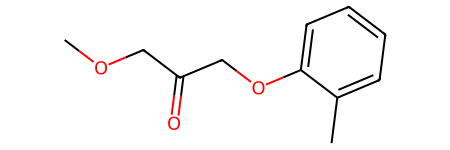

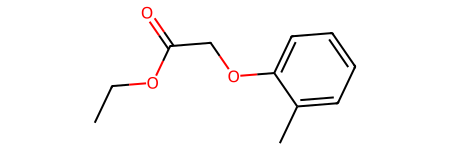

In [103]:
from rdkit.Chem.Draw import MolsToGridImage
reactants = [deck[3].reactants[0], designer.generator(deck[3].reactants[1])]

with deck[3].set_reactants(reactants):
    for _ in range(10):
        analogs = deck[3].reaction.run(deck[3].reactants)
        display(next(analogs))

Make designer.

In [3]:
from dgym.molecule import Molecule
from dgym.envs.designer import Designer, Generator
from dgym.envs.drug_env import DrugEnv
from dgym.agents import SequentialDrugAgent
from dgym.agents.exploration import EpsilonGreedy
from dgym.experiment import Experiment
import numpy as np

# Set up experiment.
designer = Designer(
    Generator(building_blocks, fingerprints, sizes=sizes),
    reactions,
    cache = True
)

Design!

In [4]:
designer